<a href="https://colab.research.google.com/github/NelbaBarreto/programacion-ciencias-datos/blob/trabajo_practico_estadistica/trabajo_practico_estadistica_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico de Probabilidad y Estadística

Integrantes

*   Nelba Barreto
*   Miguel Franco
*   Guillermo Osorio
*   Gustavo Granada

## Importar librerías

In [1661]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from scipy import stats
from IPython.display import Image
from base64 import b64decode
import warnings

warnings.filterwarnings('ignore') # o warnings.filterwarnings(action='once')

## Lectura de los datos

In [1662]:
url1 = "https://raw.githubusercontent.com/NelbaBarreto/programacion-ciencias-datos/main/data/REG02_EPHC2022.csv"
url2 = "https://raw.githubusercontent.com/NelbaBarreto/programacion-ciencias-datos/main/data/REG02_EPHC2021.csv"

df1 = pd.read_csv(url1, delimiter=";")
df2 = pd.read_csv(url2, delimiter=";")

frames = [df1, df2]
df = pd.concat(frames)

## Visualizar los datos

In [1663]:
df.head()

,UPM,NVIVI,NHOGA,DPTOREP,AREA,L02,P02,P03,P04,P04A,...,quintiai,decilai,informalidad,A18A,B05A,E02D1,E02D2,E02B,ingrepytyvõde,ingresect_privadode
0,30,1,1,0,1,1,42,1,1,1,...,3,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30,1,1,0,1,2,14,3,1,1,...,3,6,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30,1,1,0,1,3,12,3,1,1,...,3,6,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30,1,1,0,1,4,20,3,1,1,...,3,6,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30,1,1,0,1,5,25,6,1,1,...,3,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Verificar el tamaño del conjunto de datos

In [1664]:
df.shape

(33948, 257)

## Preprocesamiento

In [1665]:
# Seleccionamos las columnas en las que estamos interesados
edad = [
    {
        "P02": {
            "renombrar": "edad",
            "descripcion": "Edad del miembro del hogar",
            "mapper": None,
        }
    },
]
sexo = [
    {
        "P06": {
            "renombrar": "sexo",
            "descripcion": "Sexo",
            "mapper": pd.read_csv(io.StringIO('''
Hombres,1
Mujeres,6
'''), header=None)
            }
        },
]

nivel_educativo = [
    {
      "añoest": {
            "renombrar": "anhos_estudio",
            "descripcion": "Años de estudio",
            "mapper": None,
        }
    },
    {
        "ED0504": {
            "renombrar": "educacion_nivel_mas_alto",
            "descripcion": "Nivel y grado más alto que aprobó",
            "mapper": pd.read_csv(io.StringIO('''
Sin instrucción,0
Educación especial,101:112
Educación Inicial,210:212
EEB 1ª al 6ª (Primaria),301:306
EEB 7º al 9º,407:409
Secundario Básico,501:503
Bachiller Humanístico/Científico,604:607
Bachiller Técnico/Comercial,704:706
Bachillerato a distancia,803
Educación Media Científica,901:903
Educación Media Técnica,1001:1003
Educación Media Abierta,1101:1103
Educ. Básica Bilingüe para personas Jóvenes y Adultas,1201:1204
Educ. Media a Distancia para Jóvenes y Adultos,1301:1304
Educ. Básica Alternativa de Jóvenes y Adultos,1401:1403
Educ. Media Alternativa de Jóvenes y Adultos,1501:1504
Educ. Media para Jóvenes y Adultos,1601:1604
Formación profesional no Bachillerato de la Media,1701:1703
Programa de Alfabetización,1801
Grado especial/Programas especiales,1900
Técnica Superior,2001:2004
Formación Docente,2101:2104
Profesionalización Docente,2201:2206
Formación Militar/Policial,2301:2304
Universitario,2401:2406
NR,9999
NA,8888
'''), header=None),
        }
    },
]
ocupacion = [
    {
        "B01REC": {
            "renombrar": "ocupacion_principal",
            "descripcion": "Código ocupación principal en los últimos 7 días",
            "mapper": pd.read_csv(io.StringIO('''
"Miembros del Poder Ejecutivo, Legislativo y Judicial, personal directivo de la Administración pública y de empresa",1
Profesionales científicos e intelectuales,2
Técnicos y profesionales de nivel medio,3
Empleados de oficina,4
Trabajadores de los servicios y vendedores de comercios y mercados,5
Agricultores y trabajadores Agropecuarios y Pesqueros,6
"Oficiales, operarios y artesanos de artes mecánicas y de otros oficios",7
Operadores de instalaciones y máquinas y montadores,8
Trabajadores no calificados,9
Fuerzas armadas,10
NR,99
NA,Blanco
'''), header=None),
        }
    },
    {
        "B02REC": {
            "renombrar": "ocupacion_rama",
            "descripcion": "Código rama de actividad ocupación principal",
            "mapper": pd.read_csv(io.StringIO('''
"Agricultura, ganadería, caza, silvicultura y pesca",1
Industrias manufactureras,2
"Electricidad, gas y agua",3
Construcciones,4
"Comercio al por mayor y menor, restaurantes y hoteles",5
"Transporte, almacenamiento y comunicaciones",6
"Establecimientos financieros, seguros, bienes inmuebles y servicios prestados a las empresas",7
"Servicios comunales, sociales y personales",8
NR,99
NA,Blanco
'''), header=None),
        }
    },
]

ingresos = [
    {
        "e01aimde": {
            "renombrar": "ingreso_mensual_actividad_principal",
            "descripcion": "Ingreso mensual que habitualmente recibe de la actividad principal",
            "mapper": None,
        }
    },
    {
        "e01bimde": {
            "renombrar": "ingreso_mensual_actividad_secundaria",
            "descripcion": "Ingreso mensual que habitualmente recibe de la actividad secundaria",
            "mapper": None,
        }
    },
    {
        "e01cimde": {
            "renombrar": "ingreso_mensual_otras_actividades",
            "descripcion": "Ingreso mensual que habitualmente recibe de todas las otras actividades",
            "mapper": None,
        }
    },
    {
        "e01dde": {
            "renombrar": "ingreso_alquileres",
            "descripcion": "Ingreso mensual que habitualmente recibe por alquileres o rentas neto",
            "mapper": None,
        }
    },
    {
        "e01ede": {
            "renombrar": "ingreso_dividendos",
            "descripcion": "Ingreso mensual que habitualmente recibe por intereses, dividendos o utilidades",
            "mapper": None,
        }
    },
    {
        "e01fde": {
            "renombrar": "ingreso_ayuda_familiar_nacional",
            "descripcion": "Ingreso mensual que habitualmente recibe como ayuda familiar del país",
            "mapper": None,
        }
    },
    {
        "e02bde": {
            "renombrar": "ingreso_ayuda_familiar_extranjero",
            "descripcion": "Ingreso mensual que habitualmente recibe de ayuda familiar del exterior",
            "mapper": None,
        }
    },
    {
        "e01gde": {
            "renombrar": "ingreso_prestaciones_divorcio_hijos",
            "descripcion": "Ingreso mensual prestaciones por divorcios o cuidado de hijos",
            "mapper": None,
        }
    },
    {
        "e01hde": {
            "renombrar": "ingreso_jubilacion",
            "descripcion": "Ingreso mensual por jubilación",
            "mapper": None,
        }
    },
    {
        "e01ide": {
            "renombrar": "ingreso_estado_tekopora",
            "descripcion": "Ingreso mensual del Estado (Monetario: Tekoporã)",
            "mapper": None,
        }
    },
    {
        "e01jde": {
            "renombrar": "ingreso_pension",
            "descripcion": "Ingreso mensual Pensión (ex combatiente,viudas,etc)",
            "mapper": None,
        }
    },
    {
        "e01kde": {
            "renombrar": "ingreso_pension_adulto_mayor",
            "descripcion": "Ingreso mensual del Estado (Monetario: Adulto Mayor)",
            "mapper": None,
        }
    },
    {
        "e01lde": {
            "renombrar": "ingreso_publico_viveres",
            "descripcion": "Ingreso por víveres de alguna Institución pública",
            "mapper": None,
        }
    },
    {
        "e01mde": {
            "renombrar": "ingreso_otros_varios",
            "descripcion": "Ingreso mensual que habitualmente recibe por otros ingresos",
            "mapper": None,
        }
    },
    {
        "e01kjde": {
            "renombrar": "ingreso_agro",
            "descripcion": "Ingreso mensual que habitualmente recibe por otros ingresos agro asignados al jefe",
            "mapper": None,
        }
    }
]

def obtener_claves(lista):
    return [list(d.keys())[0] for d in lista]

columnas_seleccionadas = obtener_claves(edad + sexo + ocupacion + ingresos + nivel_educativo)

In [1666]:
df = df[columnas_seleccionadas]
df.columns

Index(['P02', 'P06', 'B01REC', 'B02REC', 'e01aimde', 'e01bimde', 'e01cimde',
       'e01dde', 'e01ede', 'e01fde', 'e02bde', 'e01gde', 'e01hde', 'e01ide',
       'e01jde', 'e01kde', 'e01lde', 'e01mde', 'e01kjde', 'añoest', 'ED0504'],
      dtype='object')

In [1667]:
# renombramos columnas
def renombrar_columnas(df, lista):
    for d in lista:
        for k, v in d.items():
            df.rename(columns={k: v["renombrar"]}, inplace=True)

renombrar_columnas(df, edad + sexo + ocupacion + ingresos + nivel_educativo)

In [1668]:
# Reemplazar cadenas vacías y valores 999 con NaN
df.replace([" ", "9999", "8888", "999", "99"], np.nan, inplace=True)

# Reemplazar el valor 0 (mujeres) con 1 en la columna de sexo
df["sexo"].replace(0, 1, inplace=True)

# Reemplazar el valor 6 (hombres) con 2 en la columna de sexo
df["sexo"].replace(6, 2, inplace=True)

# Contar la cantidad de nulos por columna
print(df.isnull().sum())

edad                                        0
sexo                                        0
ocupacion_principal                     17283
ocupacion_rama                          17282
ingreso_mensual_actividad_principal         0
ingreso_mensual_actividad_secundaria        0
ingreso_mensual_otras_actividades           0
ingreso_alquileres                          0
ingreso_dividendos                          0
ingreso_ayuda_familiar_nacional             0
ingreso_ayuda_familiar_extranjero           0
ingreso_prestaciones_divorcio_hijos         0
ingreso_jubilacion                          0
ingreso_estado_tekopora                     0
ingreso_pension                             0
ingreso_pension_adulto_mayor                0
ingreso_publico_viveres                     0
ingreso_otros_varios                        0
ingreso_agro                                0
anhos_estudio                            2789
educacion_nivel_mas_alto                 3423
dtype: int64


In [1669]:
# Hacer drop de las filas con datos nulos
df.dropna(inplace=True)

In [1670]:
# Contar la cantidad de nulos por columna
print(df.isnull().sum())

edad                                    0
sexo                                    0
ocupacion_principal                     0
ocupacion_rama                          0
ingreso_mensual_actividad_principal     0
ingreso_mensual_actividad_secundaria    0
ingreso_mensual_otras_actividades       0
ingreso_alquileres                      0
ingreso_dividendos                      0
ingreso_ayuda_familiar_nacional         0
ingreso_ayuda_familiar_extranjero       0
ingreso_prestaciones_divorcio_hijos     0
ingreso_jubilacion                      0
ingreso_estado_tekopora                 0
ingreso_pension                         0
ingreso_pension_adulto_mayor            0
ingreso_publico_viveres                 0
ingreso_otros_varios                    0
ingreso_agro                            0
anhos_estudio                           0
educacion_nivel_mas_alto                0
dtype: int64


In [1671]:
# Cambiar el tipo de dato de horas trabajadas a int
df["ocupacion_rama"] = df["ocupacion_rama"].astype(int)
df["educacion_nivel_mas_alto"] = df["educacion_nivel_mas_alto"].astype(int)

In [1672]:

# Reemplazar las cadenas vacías en el campo educacion_nivel_mas_alto con 0
df["educacion_nivel_mas_alto"] = df["educacion_nivel_mas_alto"].replace(" ", 0)

# Crear una nueva columna que contenga la descripción del nivel más alto
# cursado de educación
educacion_dict = {
    0: [0],
    1: list(range(101, 113)),
    2: list(range(210, 213)),
    3: list(range(301, 307)),
    4: list(range(407, 410)),
    5: list(range(501, 504)),
    6: list(range(604, 608)),
    7: list(range(704, 707)),
    8: [803],
    9: list(range(901, 904)),
    10: list(range(1001, 1004)),
    11: list(range(1101, 1104)),
    12: list(range(1201, 1205)),
    13: list(range(1301, 1305)),
    14: list(range(1401, 1404)),
    15: list(range(1501, 1505)),
    16: list(range(1601, 1605)),
    17: list(range(1701, 1704)),
    18: [1801],
    19: [1900],
    20: list(range(2001, 2005)),
    21: list(range(2101, 2105)),
    22: list(range(2201, 2207)),
    23: list(range(2301, 2305)),
    24: list(range(2401, 2407))
}

def obtener_etiqueta_educacion(valor):
    for etiqueta, rango in educacion_dict.items():
        if int(valor) in rango:
            return etiqueta
    return 999  # Para valores que no están en ningún rango

# Asignar la etiqueta del nivel de educación según el diccionario de datos
df["educacion"] = df["educacion_nivel_mas_alto"].apply(obtener_etiqueta_educacion)

df["educacion"].value_counts().sort_values(ascending=False)

educacion
3     5833
24    3429
9     2344
4     1248
6     1245
5     1035
21     397
10     263
20     217
7      132
16      80
0       70
23      68
12      55
14      16
15       8
22       5
18       4
13       4
1        3
11       2
17       2
2        1
19       1
Name: count, dtype: int64

In [1673]:
df = df.groupby("educacion").filter(lambda x: len(x) >= 100)

In [1674]:
df["educacion"].value_counts().sort_values(ascending=False)

educacion
3     5833
24    3429
9     2344
4     1248
6     1245
5     1035
21     397
10     263
20     217
7      132
Name: count, dtype: int64

In [1675]:
df.head()

,edad,sexo,ocupacion_principal,ocupacion_rama,ingreso_mensual_actividad_principal,ingreso_mensual_actividad_secundaria,ingreso_mensual_otras_actividades,ingreso_alquileres,ingreso_dividendos,ingreso_ayuda_familiar_nacional,...,ingreso_jubilacion,ingreso_estado_tekopora,ingreso_pension,ingreso_pension_adulto_mayor,ingreso_publico_viveres,ingreso_otros_varios,ingreso_agro,anhos_estudio,educacion_nivel_mas_alto,educacion
0,42,2,9,5,"1985645,933",0,0,0,0,0,...,0,0,0,0,0,0,0,6,306,3
4,25,1,8,2,"4964114,833",0,0,0,0,0,...,0,0,0,0,0,0,0,13,2001,20
5,50,1,5,5,"2978468,9",0,0,0,0,0,...,0,0,0,0,0,0,0,12,606,6
6,50,2,5,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,503,5
9,25,2,3,6,"4964114,833",0,0,0,0,0,...,0,0,0,0,0,0,0,16,2404,24


In [1676]:
# Transformamos las variables numericas a su correspondiente
def convertir_a_entero_redondeado(s):
    if type(s) == str:
        s_sin_comas = s.replace(',', '.')
        s_sin_comas = float(s_sin_comas)
        numero_redondeado = round(float(s_sin_comas))
        return int(numero_redondeado)
    else:
        return s

for c in df.columns:
    if c.startswith("ingreso_"):
        print(c)
        df[c] = df[c].apply(convertir_a_entero_redondeado)

ingreso_mensual_actividad_principal
ingreso_mensual_actividad_secundaria
ingreso_mensual_otras_actividades
ingreso_alquileres
ingreso_dividendos
ingreso_ayuda_familiar_nacional
ingreso_ayuda_familiar_extranjero
ingreso_prestaciones_divorcio_hijos
ingreso_jubilacion
ingreso_estado_tekopora
ingreso_pension
ingreso_pension_adulto_mayor
ingreso_publico_viveres
ingreso_otros_varios
ingreso_agro


In [1677]:
# Crear una nueva columna 'ingreso_total' como la suma de todos los ingresos
# Lista de columnas a sumar
columnas_a_sumar = [
    "ingreso_mensual_actividad_principal",
    "ingreso_mensual_actividad_secundaria",
    "ingreso_mensual_otras_actividades",
    "ingreso_alquileres",
    "ingreso_dividendos",
    "ingreso_ayuda_familiar_nacional",
    "ingreso_ayuda_familiar_extranjero",
    "ingreso_prestaciones_divorcio_hijos",
    "ingreso_jubilacion",
    "ingreso_estado_tekopora",
    "ingreso_pension",
    "ingreso_pension_adulto_mayor",
    "ingreso_publico_viveres",
    "ingreso_otros_varios",
    "ingreso_agro"
]

df["ingreso_total"] = df[columnas_a_sumar].sum(axis=1)
df.drop(columnas_a_sumar, axis=1, inplace=True)

In [1678]:
mask = (
    (df["ingreso_total"] > 0) &
    (df["ingreso_total"] <= 40000000) &
    (df["edad"] >= 22) &
    (df["edad"] <= 55)
)
df = df[mask]

In [1679]:
df.shape

(10442, 8)

In [1680]:
df.describe()

,edad,sexo,ocupacion_rama,educacion_nivel_mas_alto,educacion,ingreso_total
count,10442.000000,10442.000000,10442.000000,10442.000000,10442.000000,1.044200e+04
mean,37.125934,1.418790,4.812009,1108.923865,11.046351,2.789320e+06
std,9.447354,0.493384,2.589680,883.906329,8.844827,2.900957e+06
min,22.000000,1.000000,1.000000,301.000000,3.000000,2.500000e+03
25%,29.000000,1.000000,2.000000,306.000000,3.000000,1.219250e+06
50%,36.000000,1.000000,5.000000,606.000000,6.000000,2.200000e+06
75%,45.000000,2.000000,8.000000,2402.000000,24.000000,3.200000e+06
max,55.000000,2.000000,8.000000,2406.000000,24.000000,3.606829e+07


In [1681]:
correlation_matrix = df.corr()
correlation_matrix

,edad,sexo,ocupacion_principal,ocupacion_rama,anhos_estudio,educacion_nivel_mas_alto,educacion,ingreso_total
edad,1.000000,-0.016021,-0.031692,-0.077123,-0.299772,-0.263569,-0.263633,0.090813
sexo,-0.016021,1.000000,-0.193953,0.319633,0.154612,0.180893,0.180809,-0.069249
ocupacion_principal,-0.031692,-0.193953,1.000000,-0.287676,-0.521094,-0.558623,-0.558394,-0.366781
ocupacion_rama,-0.077123,0.319633,-0.287676,1.000000,0.406662,0.385019,0.384924,0.159879
anhos_estudio,-0.299772,0.154612,-0.521094,0.406662,1.000000,0.883835,0.883553,0.322810
educacion_nivel_mas_alto,-0.263569,0.180893,-0.558623,0.385019,0.883835,1.000000,0.999998,0.311562
educacion,-0.263633,0.180809,-0.558394,0.384924,0.883553,0.999998,1.000000,0.311398
ingreso_total,0.090813,-0.069249,-0.366781,0.159879,0.322810,0.311562,0.311398,1.000000


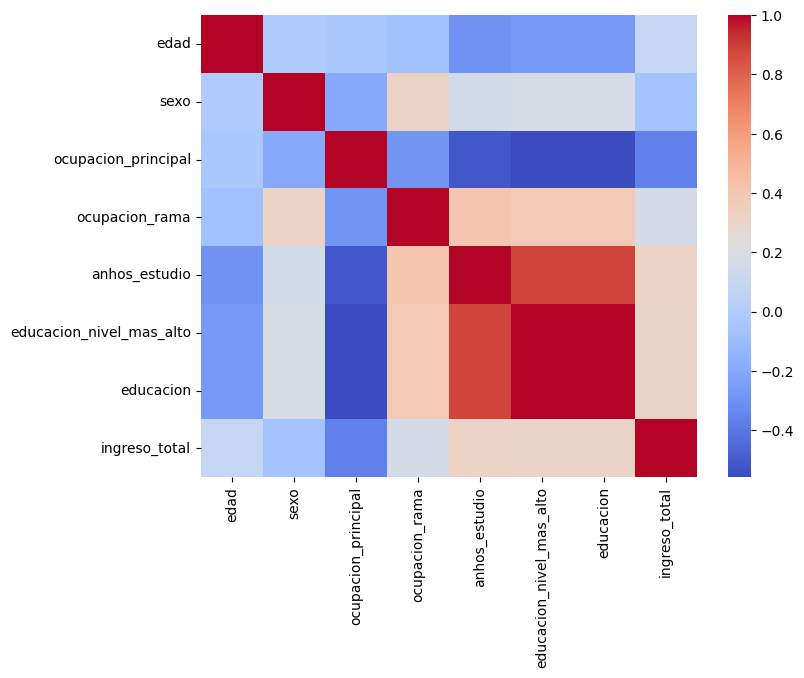

In [1682]:
# Crear el heatmap
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, cmap = 'coolwarm')
plt.show()

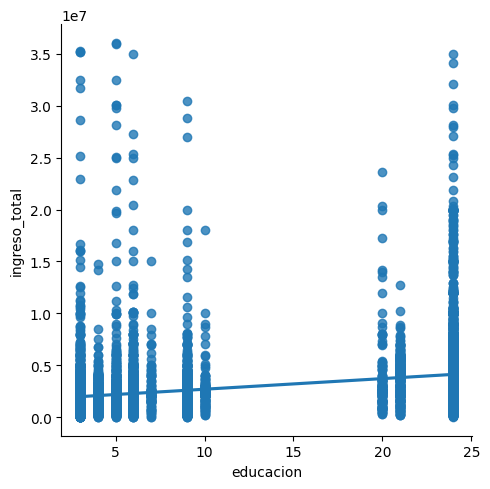

In [1683]:
ax= sns.lmplot(x="educacion", y="ingreso_total", data=df)
ax

## Distribución de frecuencias de la variable dependiente (y)

<Axes: title={'center': 'Distribución de Frecuencias'}, xlabel='ingreso_total', ylabel='Ingreso Total'>

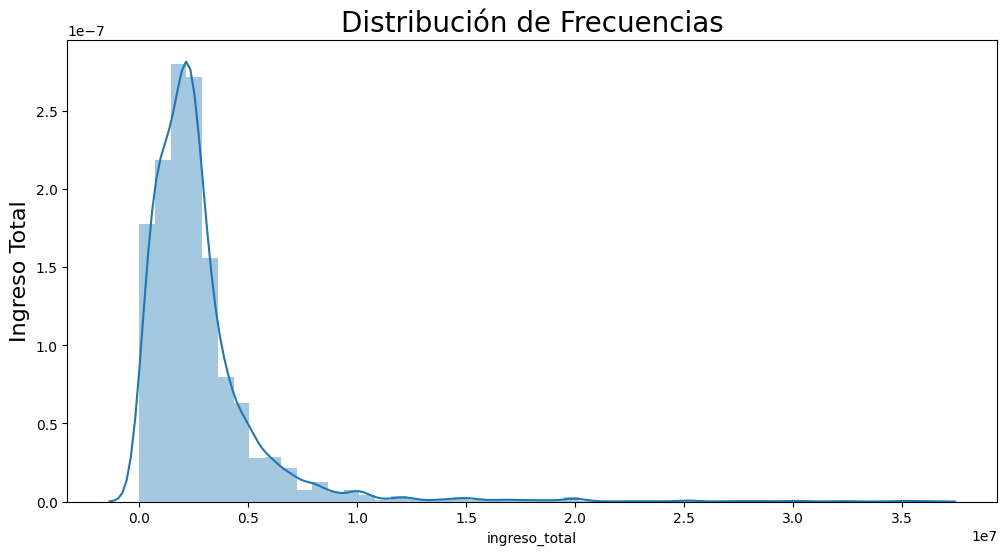

In [1684]:
ax = sns.distplot(df['ingreso_total'])
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribución de Frecuencias", fontsize=20)
ax.set_ylabel("Ingreso Total", fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Estimando un Modelo de Regresión Lineal</font>

In [1685]:
from sklearn.model_selection import train_test_split

In [1686]:
y = df["ingreso_total"]

In [1687]:
X = df[["educacion_nivel_mas_alto", "ocupacion_principal"d]]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-1687-807e7288dd02>, line 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=2811)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_train.shape[0] + X_test.shape[0]

<hr />

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO

In [ ]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

## Generando previsiones para los datos de PRUEBA (X_test) utilizando el método *predict()* del objeto "modelo"

In [ ]:
y_previsto = modelo.predict(X_test)

## Obteniendo el coeficiente de determinación (R²) para las previsiones del modelo

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))